
# <center><span style='background:blue'>Scoring pour un établissement financier </span></center>
==================================================================================================================

# <a name= 'sommaire'> Sommaire </a>
## 1.[Objectif](#Objectif)

## 2.[Analyse exploratoire](#Analyse_exploratoire)
* [**Sélection des variables**](#Sélection-des-variables)
* [**Visualisation des Variables**](#Visualisation-des-Variables)
* [**Relation TARGET-Variables**](#Relation-TARGET-Variables)
* [**Relation variable-variable**](#Relation-variable-variable)
* [**Missing Values**](#Missing-Values)
* [**Visualisation des données à l'aide de l'ACP**](#Visualisation-des-données-ACP)


## 3.[Pre-processing](#Pre-processing)
* [**Feature engineering**](#Feature-engineering)
* [**Données de l'entraînement et de test**](#split-des-données)

## 4. [Modélisation](#Modélisation)
* [**Classifier Aléatoire**](#Classifier-Aléatoire)
* [**Régression logistique**](#Régression-logistique)
* [**Arbre de décision**](#Arbre-de-décision)
* [**Forêt Aléatoire**](#Forêt-Aléatoire)
* [**Gradient Boosting**](#Gradient-Boosting)    

## 5. [Choix du modèle](#Choix-du-modèle)
## 6. [Interprétabilité du modèle](#Interprétabilité-du-modèle)     
*  [**Global**](#Global)
*  [**Local**](#Local)



# <a name= "Objectif"> 1. Objectif</a>

Pour que l'entreprise "Prêt à dépenser" (une entreprise qui propose un crédit à la consommation) prenne des bonnes décisions à accorder un crédit, je réalise ce projet pour mettre en oeuvre un outil de 'scoring crédit' en utilisant des données provenant de 'Home Credit' qui est un fournisseur mondial du crédit à la consommation aux personnes ayant peu ou pas d'historique de crédit.

Sur ce notebook je vais analyser que les données du fichier 'application_train.csv' pour faire la prédiction sur les données du fichier 'application_test.csv'.

<a href="#sommaire" rev="footnote">&#8617;</a>

# <a name ='Analyse_exploratoire'> 2. Analyse exploratoire</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time
%matplotlib inline
t0 = time()


In [2]:
path ='Projet+Mise+en+prod+-+home-credit-default-risk/'

In [3]:
import os

# liste des fichiers fournis
print('Liste des fichiers fournis : \n ')
folder =os.listdir(path)
print(*folder, sep="\n")
folder.remove("HomeCredit_columns_description.csv")

Liste des fichiers fournis : 
 
application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


In [4]:
#lecture des fichiers

application_train = pd.read_csv(path + "application_train.csv")
application_test = pd.read_csv(path + "application_test.csv")

In [5]:
print('application train shape: ',application_train.shape)
print('application test shape: ',application_test.shape)

application train shape:  (307511, 122)
application test shape:  (48744, 121)


In [6]:
print('Affichage des premières lignes du dataframe')
pd.set_option('display.max_column',121)
# pd.set_option("display.max_row",307511)
application_train.head(n=3)

Affichage des premières lignes du dataframe


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,...,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,...,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [7]:
pd.set_option('display.max_column',121)
# pd.set_option("display.max_row",307511)
application_test.head(n=3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


<a href="#sommaire" rev="footnote">&#8617;</a>

## Target

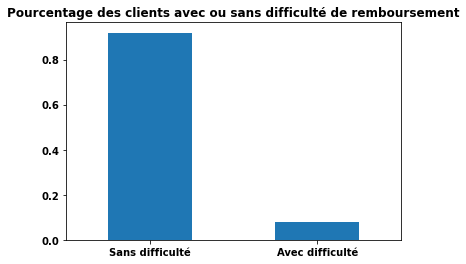

In [8]:
ax = application_train.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks(ticks=[0,1], labels=['Sans difficulté','Avec difficulté'], rotation=0)
plt.title('Pourcentage des clients avec ou sans difficulté de remboursement' )
plt.show()

##   <a name ='Sélection-des-variables'>**Sélection des variables**</a>

In [9]:
columns_selection = ['SK_ID_CURR',
'NAME_CONTRACT_TYPE',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'ORGANIZATION_TYPE',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'OBS_60_CNT_SOCIAL_CIRCLE',#How many observation of client's social surroundings with observable 60 DPD (days past due) default,
'DEF_60_CNT_SOCIAL_CIRCLE',#How many observation of client's social surroundings defaulted on 60 (days past due) DPD,
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'TARGET']
app_train_ = application_train[columns_selection].copy()
app_train = app_train_.copy()
app_test = application_test[columns_selection[:-1]].copy()
print('Dimension des données après première sélection des variables : \n')
print('Application train shape :',app_train_.shape)
print('Application test shape :',app_test.shape)

Dimension des données après première sélection des variables : 

Application train shape : (307511, 22)
Application test shape : (48744, 21)


<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='Visualisation-des-Variables'>Visualisation des Variables</a>

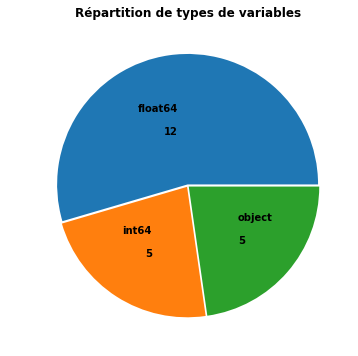

In [10]:
types = app_train_.dtypes.value_counts()
labels = [f'{type}\n\n{fi}' for type, fi in zip(types.index, types)]
lab = [fi for fi in app_train_.dtypes.value_counts()]
app_train_.dtypes.value_counts().plot(kind="pie", explode=[0.01,0.01,0.01], 
                                             labels=labels, labeldistance=0.5, figsize=(6,6))
plt.ylabel(' ')
plt.title("Répartition de types de variables")
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des variables Float

In [11]:
print("Résumé des variables quantitatives: \n")
app_train_.select_dtypes('number').describe()

Résumé des variables quantitatives: 



,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,0.502130,5.143927e-01,0.510853,1.405292,0.100049,1.422245,0.143421,0.080729
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,0.211062,1.910602e-01,0.194844,2.379803,0.362291,2.400989,0.446698,0.272419
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,0.334007,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,0.505998,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,0.675053,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.962693,8.549997e-01,0.896010,344.000000,24.000000,348.000000,34.000000,1.000000


  0%|          | 0/15 [00:00<?, ?it/s]

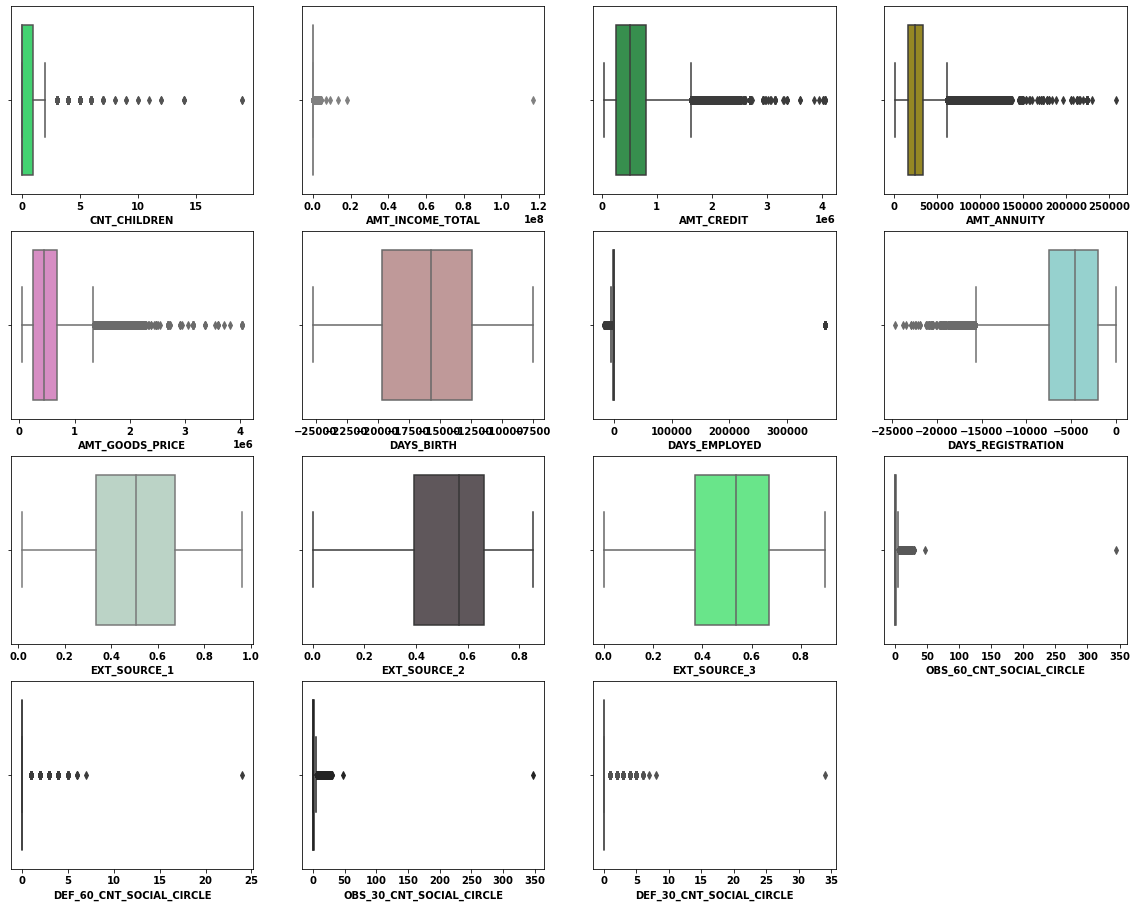

In [12]:
from tqdm.notebook import tqdm
plt.figure(figsize=(20,20))
for i, col in tqdm(enumerate(app_train_.select_dtypes('number').columns.drop(['TARGET', 'SK_ID_CURR'])), total=15):
    plt.subplot(5,4,(i+1))
    color = np.random.uniform(low=0., high = 1., size=3)
    sns.boxplot(data=app_train_, x=col, color=color)
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

* **AMT_INCOME_TOTAL**

Nombre de revenus qui dépassent le seuil 1000000.0 est : 250


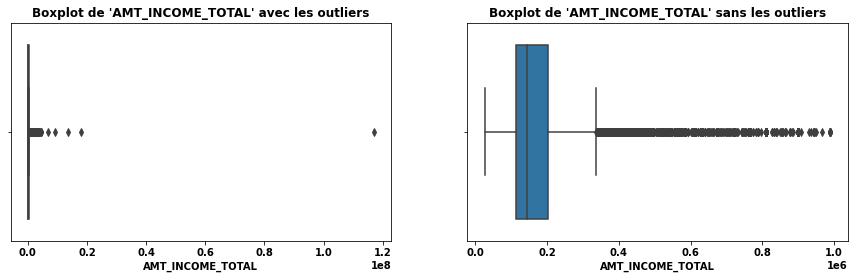

In [13]:
# les outliers des revenus

revenus = 'AMT_INCOME_TOTAL'
threshold_AMT_INCOME_TOTAL = 1e6

print(f'Nombre de revenus qui dépassent le seuil {threshold_AMT_INCOME_TOTAL} est : \
{app_train_.AMT_INCOME_TOTAL[app_train_[revenus]>threshold_AMT_INCOME_TOTAL].shape[0]}')

# remplacement des outliers par des nan
app_train.loc[app_train_[revenus]>threshold_AMT_INCOME_TOTAL,revenus] = np.nan
app_test.loc[app_test[revenus]>threshold_AMT_INCOME_TOTAL,revenus] = np.nan

#visualisation
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(data = app_train_, x = revenus)
plt.title(f'Boxplot de \'{revenus}\' avec les outliers')
plt.subplot(122)
sns.boxplot(data = app_train, x = revenus)
plt.title(f'Boxplot de \'{revenus}\' sans les outliers')
plt.show()


* **OBS_60_CNT_SOCIAL_CIRCLE**, **OBS_30_CNT_SOCIAL_CIRCLE**, **DEF_60_CNT_SOCIAL_CIRCLE**, **DEF_30_CNT_SOCIAL_CIRCLE**

In [14]:
var_f = ['OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']
app_train_[var_f].describe()

,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.405292,1.422245,0.100049,0.143421
std,2.379803,2.400989,0.362291,0.446698
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000
max,344.000000,348.000000,24.000000,34.000000


le nombre des clients dont le OBS_30_CNT_SOCIAL_CIRCLE dépasse 10 est : 2782


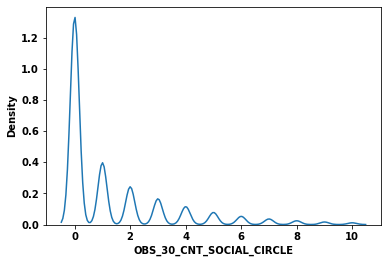

le nombre des clients dont le OBS_60_CNT_SOCIAL_CIRCLE dépasse 10 est : 2691


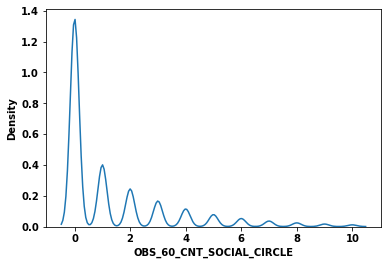

le nombre des clients dont le DEF_30_CNT_SOCIAL_CIRCLE dépasse 1 est : 6838


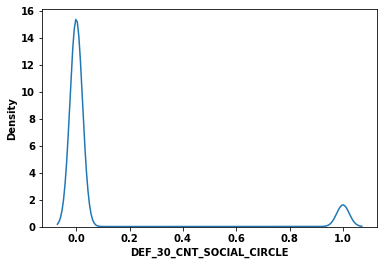

le nombre des clients dont le DEF_60_CNT_SOCIAL_CIRCLE dépasse 1 est : 3928


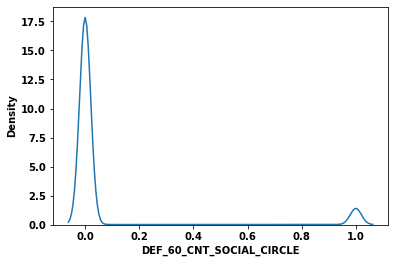

In [15]:
thld_OBS_30_CNT_SOCIAL_CIRCLE = 10
thld_OBS_60_CNT_SOCIAL_CIRCLE = 10
thld_DEF_30_CNT_SOCIAL_CIRCLE = 1
thld_DEF_60_CNT_SOCIAL_CIRCLE = 1
obs30 = "OBS_30_CNT_SOCIAL_CIRCLE"
obs60 = "OBS_60_CNT_SOCIAL_CIRCLE"
def30 = "DEF_30_CNT_SOCIAL_CIRCLE"
def60 = "DEF_60_CNT_SOCIAL_CIRCLE"

# dictionnaire des seuils des variables liées au social_circle
dict_thlds_social_circle = {obs30: thld_OBS_30_CNT_SOCIAL_CIRCLE,
                           obs60 : thld_OBS_60_CNT_SOCIAL_CIRCLE,
                           def30 : thld_DEF_30_CNT_SOCIAL_CIRCLE,
                           def60 : thld_DEF_60_CNT_SOCIAL_CIRCLE}

for var, thld in dict_thlds_social_circle.items():
    print(f'le nombre des clients dont le {var} dépasse {thld} est : {app_train_.loc[app_train_[var] > thld,var].shape[0]}')
    app_train.loc[app_train[var] > thld,var] = np.nan
    sns.kdeplot(data= app_train, x = var)
    plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

* **DAYS_EMPLOYED**

Nombre de jours travaillés qui dépasse 0 est : 55374


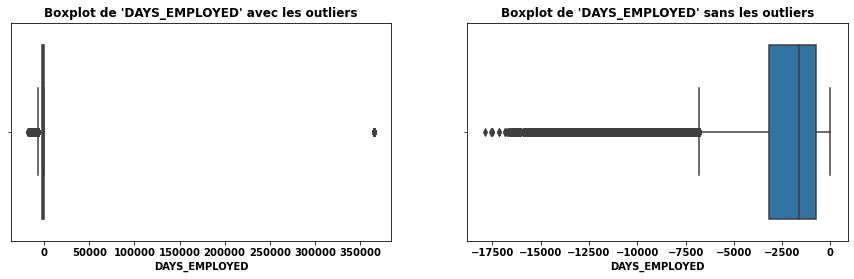

In [16]:
njours_travail = 'DAYS_EMPLOYED'
thld_DAYS_EMPLOYED = 0

print(f'Nombre de jours travaillés qui dépasse {thld_DAYS_EMPLOYED} est : \
{app_train_.loc[app_train_[njours_travail]>thld_DAYS_EMPLOYED, njours_travail].shape[0]}')

# remplacement des outliers par des nan
app_train.loc[app_train[njours_travail]>thld_DAYS_EMPLOYED,njours_travail] = np.nan

#visualisation
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(data = app_train_, x = njours_travail)
plt.title(f'Boxplot de \'{njours_travail}\' avec les outliers')
plt.subplot(122)
sns.boxplot(data = app_train, x = njours_travail)
plt.title(f'Boxplot de \'{njours_travail}\' sans les outliers')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

**Transformation des variables "DAYS_EMPLOYED" et "DAYS_BIRTH"**

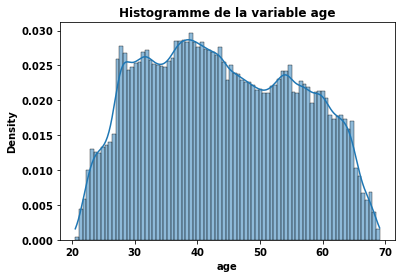

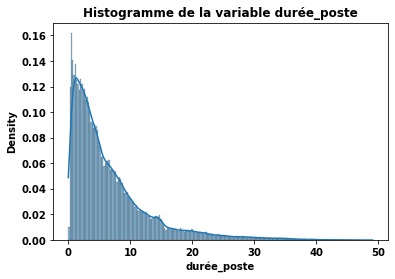

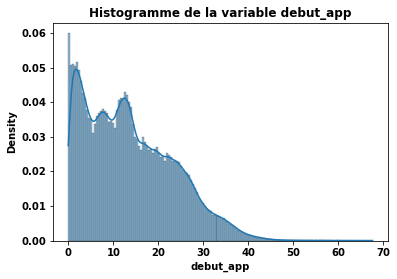

In [17]:
# variable age au moment de demande du prêt
app_train['age'] = -app_train["DAYS_BIRTH"]/365
app_test['age'] = -app_test["DAYS_BIRTH"]/365
app_train.drop(columns='DAYS_BIRTH', inplace=True)
app_test.drop(columns='DAYS_BIRTH', inplace=True)

sns.histplot(app_train, x = 'age', stat='density', kde=True)
plt.title('Histogramme de la variable age')
plt.show()

# nombre d'années du poste occupé au moment de demande du prêt
app_train['durée_poste'] = -app_train["DAYS_EMPLOYED"]/365
app_test['durée_poste'] = -app_test["DAYS_EMPLOYED"]/365
app_train.drop(columns='DAYS_EMPLOYED', inplace=True)
app_test.drop(columns='DAYS_EMPLOYED', inplace=True)

sns.histplot(app_train, x = 'durée_poste', stat='density', kde=True)
plt.title('Histogramme de la variable durée_poste')
plt.show()

# periode d'enregistrement au moment de demande du prêt
app_train['debut_app'] = -app_train['DAYS_REGISTRATION']/365
app_test['debut_app'] = -app_test['DAYS_REGISTRATION']/365
app_train.drop(columns='DAYS_REGISTRATION', inplace=True)
app_test.drop(columns='DAYS_REGISTRATION', inplace=True)
sns.histplot(app_train, x = 'debut_app', stat='density', kde=True)
plt.title('Histogramme de la variable debut_app')
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

### Visualisation des variables Object

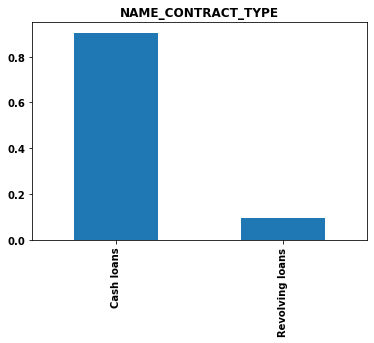

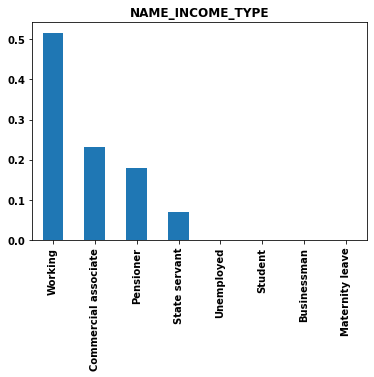

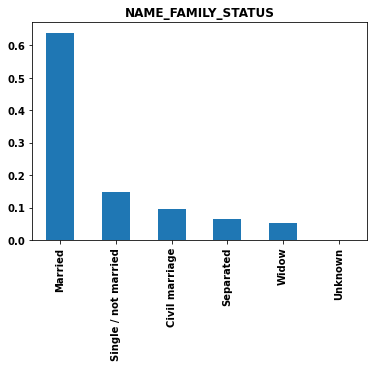

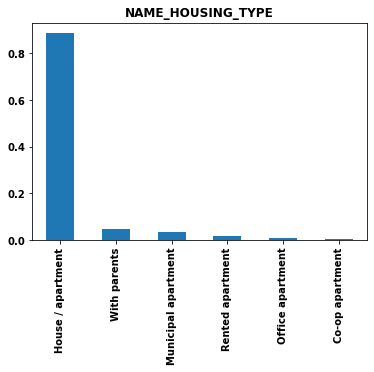

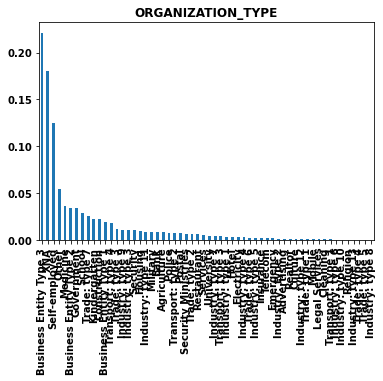

In [18]:
for obj_col in app_train_.select_dtypes('object').columns:
    app_train_[obj_col].value_counts(normalize=True).plot(kind='bar')
    plt.title(obj_col)
    plt.show()

In [19]:
print("Value counts de la variable ORGANIZATION_TYPE :")
app_train_['ORGANIZATION_TYPE'].value_counts()

Value counts de la variable ORGANIZATION_TYPE :


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='Relation-TARGET-Variables'>**Relation TARGET-Variables**</a>

### Relation TARGET-Variables float

  0%|          | 0/15 [00:00<?, ?it/s]

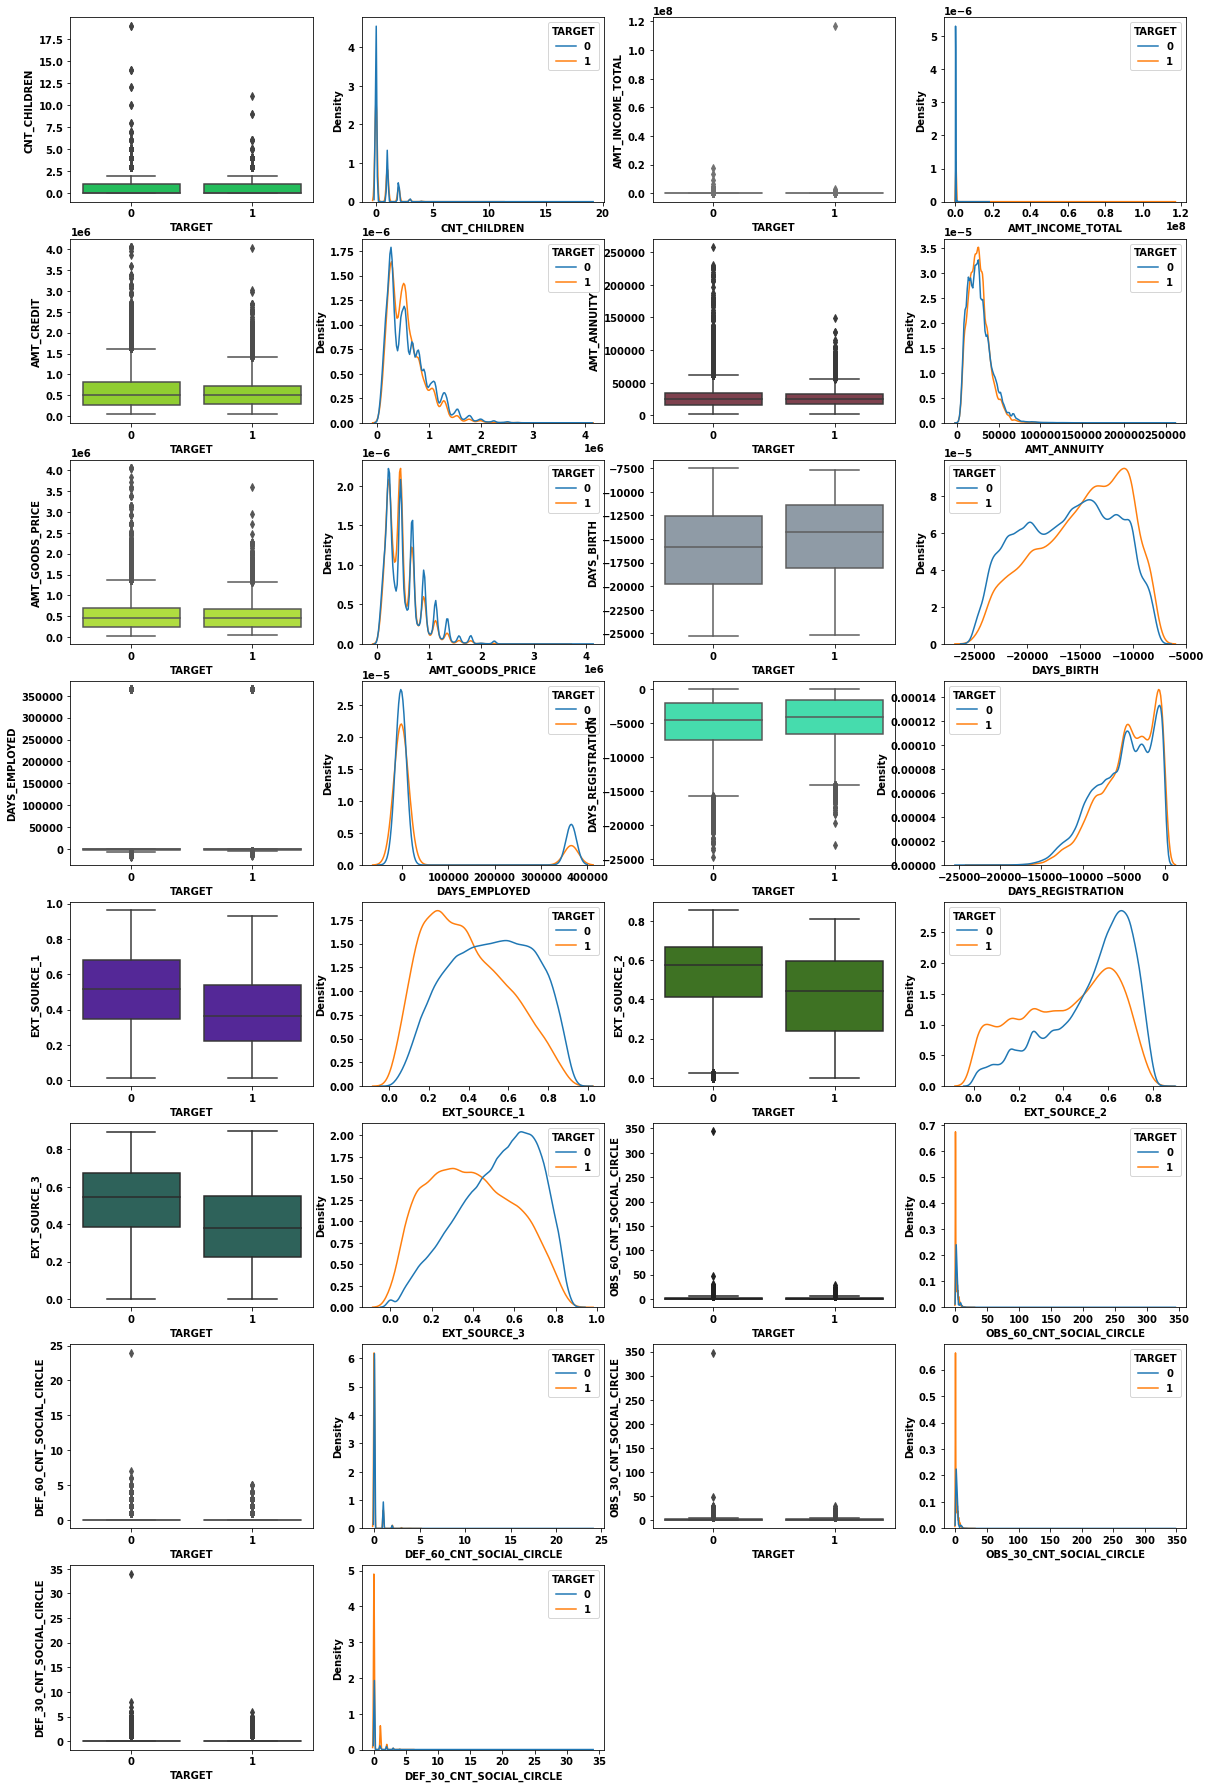

In [20]:
plt.figure(figsize=(20,40))
for i, col in tqdm(enumerate(app_train_.select_dtypes('number').columns.drop(['TARGET','SK_ID_CURR'])), total=15):
    plt.subplot(10,4,2*i+1)
    color = list(np.random.uniform(low=0.0, high=1.0, size=3))
    sns.boxplot(data= app_train_, y= col, x = 'TARGET', color=color)
    plt.subplot(10,4,2*i+2)
    sns.kdeplot(data= app_train_, x = col, hue = 'TARGET', common_norm=False)
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

### Relation TARGET-Variables object

In [21]:
print("Nombre de modalités dans chaque variable: ")
app_train_.select_dtypes(['object']).apply(np.unique).apply(len).sort_values()

Nombre de modalités dans chaque variable: 


NAME_CONTRACT_TYPE     2
NAME_FAMILY_STATUS     6
NAME_HOUSING_TYPE      6
NAME_INCOME_TYPE       8
ORGANIZATION_TYPE     58
dtype: int64

Visualisation de la table de contingence entre le label et les variables qualitatives:


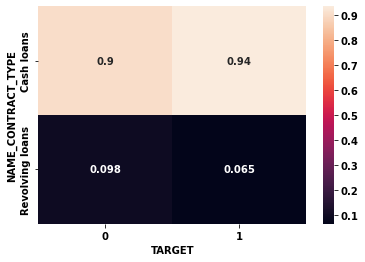

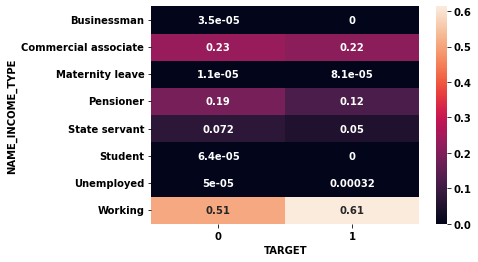

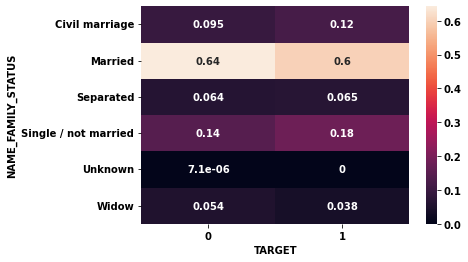

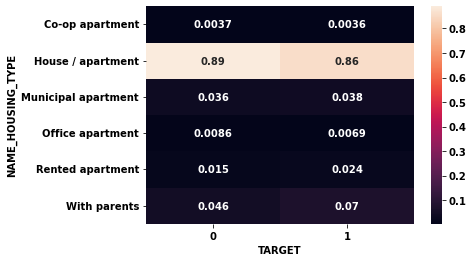

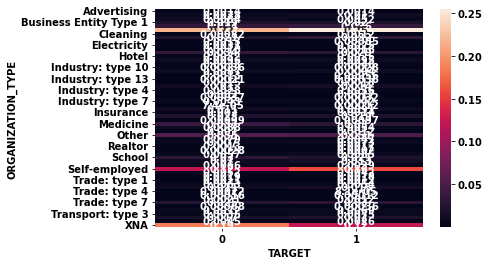

In [22]:
print("Visualisation de la table de contingence entre le label et les variables qualitatives:")
for var in app_train_.select_dtypes(object).columns:
    sns.heatmap(pd.crosstab(app_train_[var], app_train_['TARGET'], normalize='columns'), annot=True)
    plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='VRelation-variable-variable'>**Relation variable-variable**</a>

Matrice des corrélation entre les variables quantitatives: 


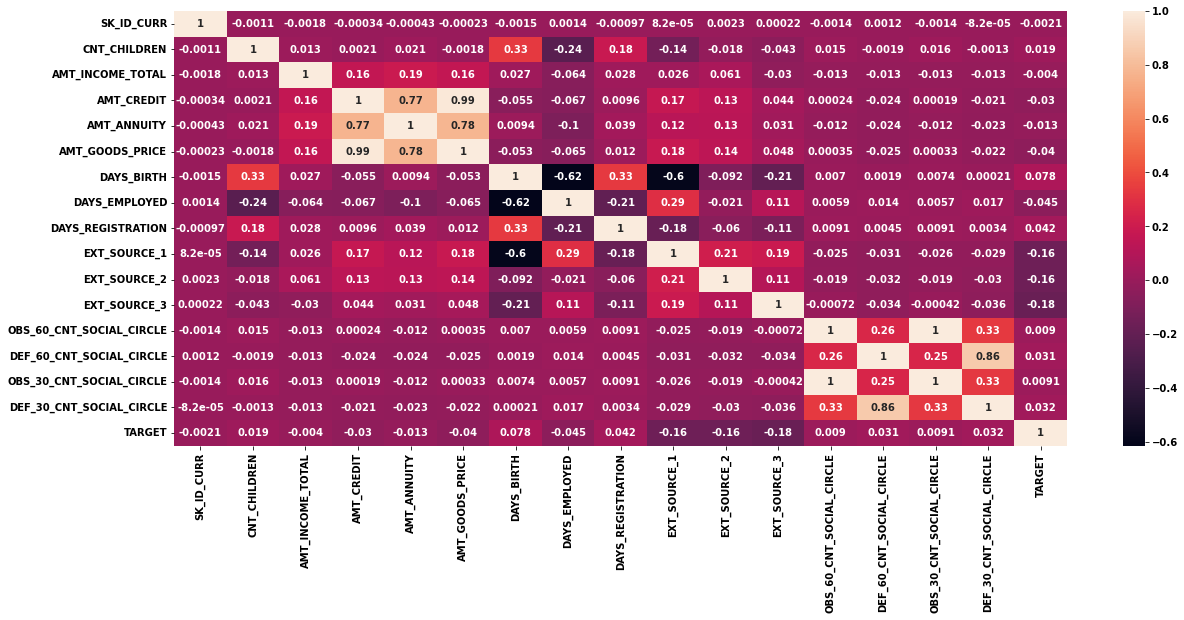

In [23]:
print("Matrice des corrélation entre les variables quantitatives: ")
plt.figure(figsize=(20,8))
sns.heatmap(app_train_.corr(), annot=True)
plt.show()

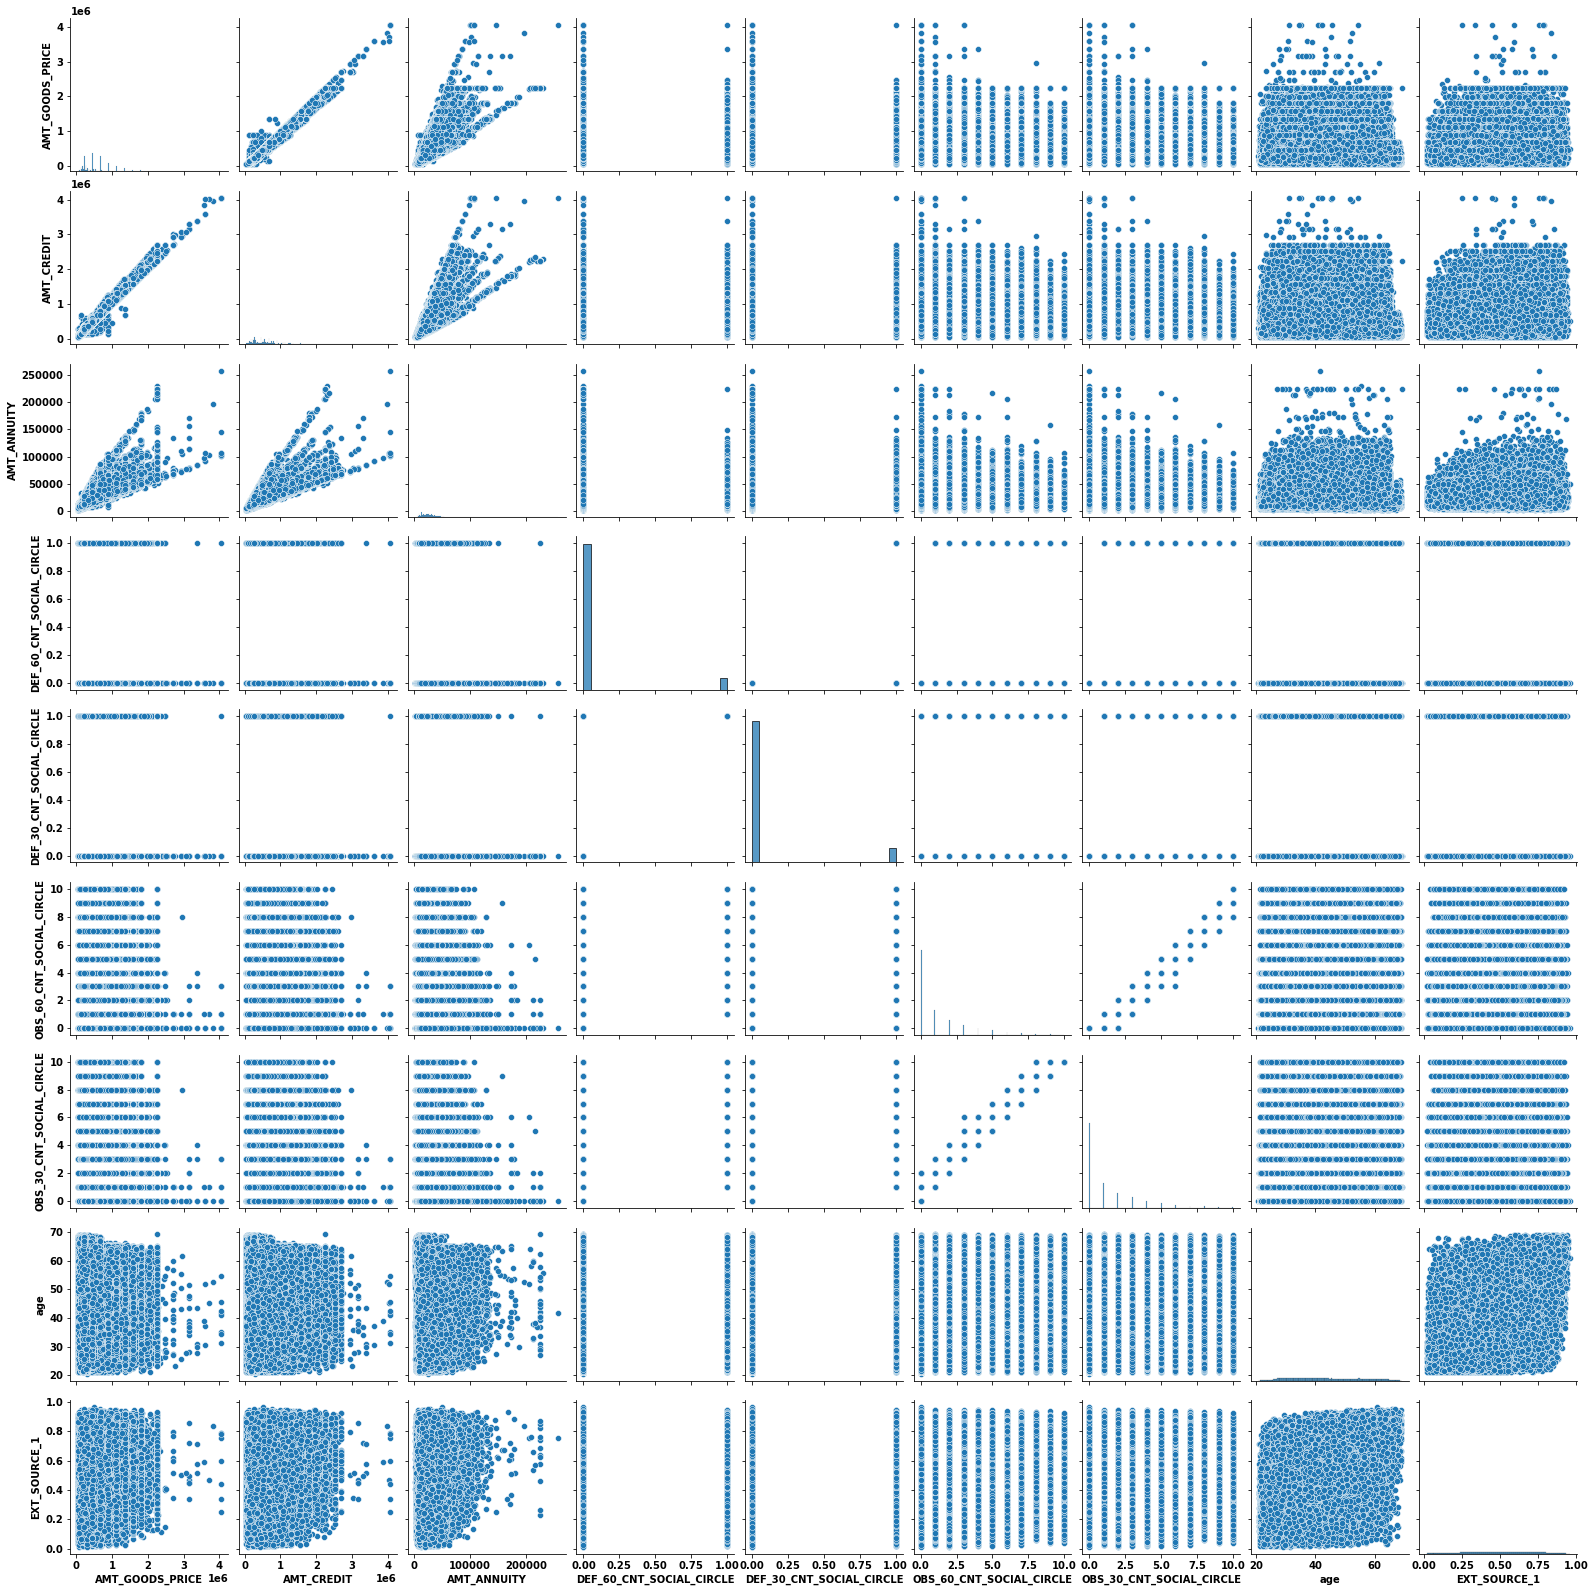

In [24]:
# les variables AMT_GOODS_PRICE et AMT_CREDIT sont très correlées
vars_corr = ['AMT_GOODS_PRICE', 'AMT_CREDIT','AMT_ANNUITY', 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 'age', 'EXT_SOURCE_1']

sns.pairplot(app_train[vars_corr])
plt.show()

In [25]:
vars_corr_1 = ['AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']
vars_corr_2 = ['AMT_ANNUITY']

<a href="#sommaire" rev="footnote">&#8617;</a>

##  <a name ='Missing-Values'>**Missing Values**</a>

In [26]:
missing_values = app_train.isnull().sum().sort_values(ascending=False)/app_train_.shape[0]
missing_values

EXT_SOURCE_1                0.563811
EXT_SOURCE_3                0.198253
durée_poste                 0.180072
DEF_30_CNT_SOCIAL_CIRCLE    0.025557
DEF_60_CNT_SOCIAL_CIRCLE    0.016094
OBS_30_CNT_SOCIAL_CIRCLE    0.012367
OBS_60_CNT_SOCIAL_CIRCLE    0.012071
EXT_SOURCE_2                0.002146
AMT_GOODS_PRICE             0.000904
AMT_INCOME_TOTAL            0.000813
AMT_ANNUITY                 0.000039
age                         0.000000
TARGET                      0.000000
SK_ID_CURR                  0.000000
NAME_CONTRACT_TYPE          0.000000
ORGANIZATION_TYPE           0.000000
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_INCOME_TYPE            0.000000
AMT_CREDIT                  0.000000
CNT_CHILDREN                0.000000
debut_app                   0.000000
dtype: float64

<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='Visualisation-des-données-ACP'>**Visualisation des données à l'aide de l'ACP**</a>

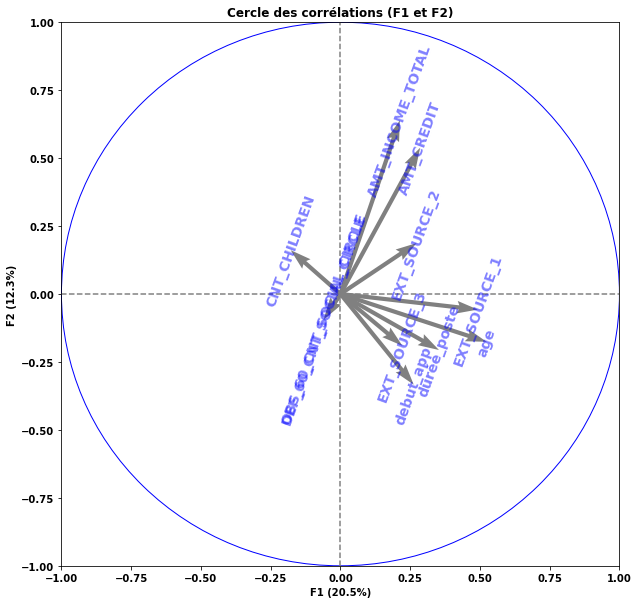

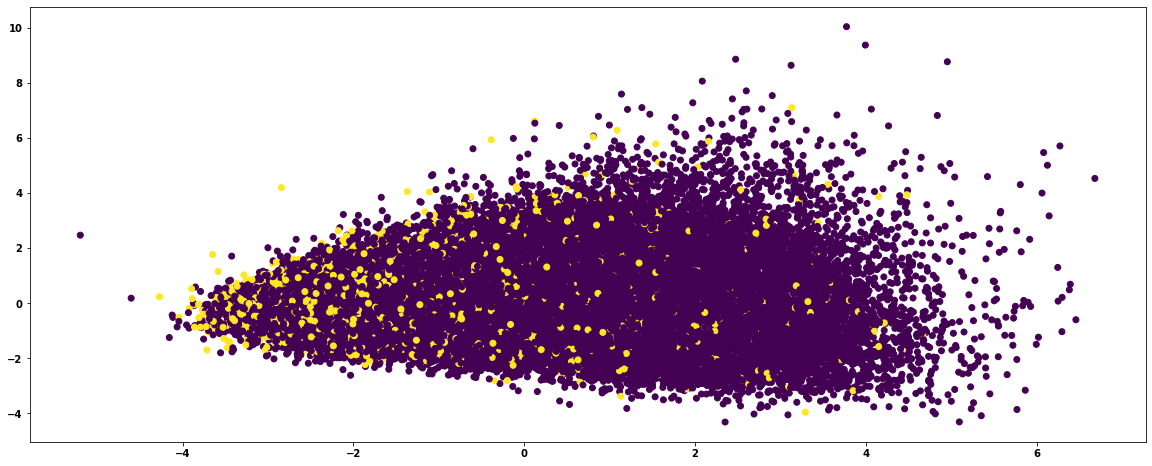

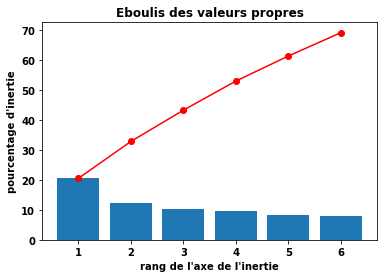

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from functions import *

X = app_train.select_dtypes(['number']).dropna()
target = X.TARGET
X.drop(columns=['TARGET', 'SK_ID_CURR'] + vars_corr_1 + vars_corr_2, inplace=True)
variables = X.columns
std_scale = StandardScaler()
X_std = std_scale.fit_transform(X)


pca = PCA(n_components=6)
pca.fit(X_std)

                        
#cercle de correlation
pcs = pca.components_
n_comp = 6
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(variables), label_rotation=70)
plt.show()

# projection des individus
plt.figure(figsize=(20,8))
X_projected = pca.transform(X_std)
plt.scatter(X_projected[:,0], [X_projected[:,1]], c=target)
plt.show()

# Graphe de l'inertie
ratio = pca.explained_variance_ratio_*100
plt.bar((np.arange(len(ratio))+1), ratio)
plt.plot((np.arange(len(ratio))+1), ratio.cumsum(), c = 'r', marker='o')
plt.xticks((np.arange(len(ratio))+1))
plt.title('Eboulis des valeurs propres')
plt.ylabel("pourcentage d'inertie")
plt.xlabel("rang de l'axe de l'inertie")
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

# <a name ='Pre-processing'>3. Pre-processing</a>

In [28]:
print("La fréquence de chaque modalité dans les variables: \n")

var1 = 'NAME_INCOME_TYPE'
var2 = 'NAME_FAMILY_STATUS'
print(var1,':')
display(app_train_[var1].value_counts())
print(var2,':')
display(app_train_[var2].value_counts())

dict1 = {'Working': 'Working', 'Commercial associate': 'Commercial associate', 'State servant':'State servant', 
       'Pensioner':'Pensioner', 'Unemployed': 'autre', 'Student' : 'autre', 'Businessman':'autre',
       'Maternity leave': 'autre', np.nan: 'autre'}

#remplacer les modalités les moins frequentes dans la variable type de contrat par 'autre'
app_train[var1] = app_train[var1].map(dict1)
app_test[var1] = app_test[var1].map(dict1)
# remplacer les modalités peu prequentes par la modalité la plus frequente dans la variable statut familial
app_train.loc[app_train[var2]=='Unknown', var2] = 'Married'
app_test.loc[app_test[var2]=='Unknown', var2] = 'Married'

print(var1,':')
display(app_train[var1].value_counts())
print(var2,':')
display(app_train[var2].value_counts())

La fréquence de chaque modalité dans les variables: 

NAME_INCOME_TYPE :


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

NAME_FAMILY_STATUS :


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

NAME_INCOME_TYPE :


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
autre                       55
Name: NAME_INCOME_TYPE, dtype: int64

NAME_FAMILY_STATUS :


Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='Feature-engineering'>**Feature engineering**</a>

On peut ajouter les variables suivant à notre dataframe:  
* 'INCOME_NCHILD'  
* 'INCOME_ANNUITY_PERCENT'    
* 'CREDIT_TERM'  
* 'durée_poste_PERCENT'  

In [29]:
app_train['INCOME_NCHILD'] = app_train['AMT_INCOME_TOTAL'] / (app_train['CNT_CHILDREN']+1)
app_test['INCOME_NCHILD'] = app_test['AMT_INCOME_TOTAL'] / (app_test['CNT_CHILDREN']+1)

app_train['INCOME_ANNUITY_PERCENT'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_ANNUITY'] 
app_test['INCOME_ANNUITY_PERCENT'] =  app_test['AMT_INCOME_TOTAL'] / app_test['AMT_ANNUITY'] 

app_train['CREDIT_TERM'] = app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY'] 
app_test['CREDIT_TERM'] = app_test['AMT_CREDIT'] / app_test['AMT_ANNUITY'] 

app_train['durée_poste_PERCENT'] =  app_train['durée_poste'] /app_train['age']
app_test['durée_poste_PERCENT'] = app_test['durée_poste'] / app_test['age']

feat_engineer_list = ['INCOME_NCHILD', 'INCOME_ANNUITY_PERCENT', 'CREDIT_TERM', 'durée_poste_PERCENT']
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET,age,durée_poste,debut_app,INCOME_NCHILD,INCOME_ANNUITY_PERCENT,CREDIT_TERM,durée_poste_PERCENT
0,100002,Cash loans,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,House / apartment,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,NaN,2.0,NaN,1,25.920548,1.745205,9.994521,202500.0,8.198215,16.461104,0.067329
1,100003,Cash loans,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,House / apartment,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,0,45.931507,3.254795,3.249315,270000.0,7.563343,36.234085,0.070862
2,100004,Revolving loans,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,House / apartment,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0,52.180822,0.616438,11.671233,67500.0,10.000000,20.000000,0.011814
3,100006,Cash loans,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,House / apartment,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,0,52.068493,8.326027,26.939726,135000.0,4.547522,10.532818,0.159905
4,100007,Cash loans,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,House / apartment,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0,54.608219,8.323288,11.810959,121500.0,5.556699,23.461618,0.152418


  0%|          | 0/4 [00:00<?, ?it/s]

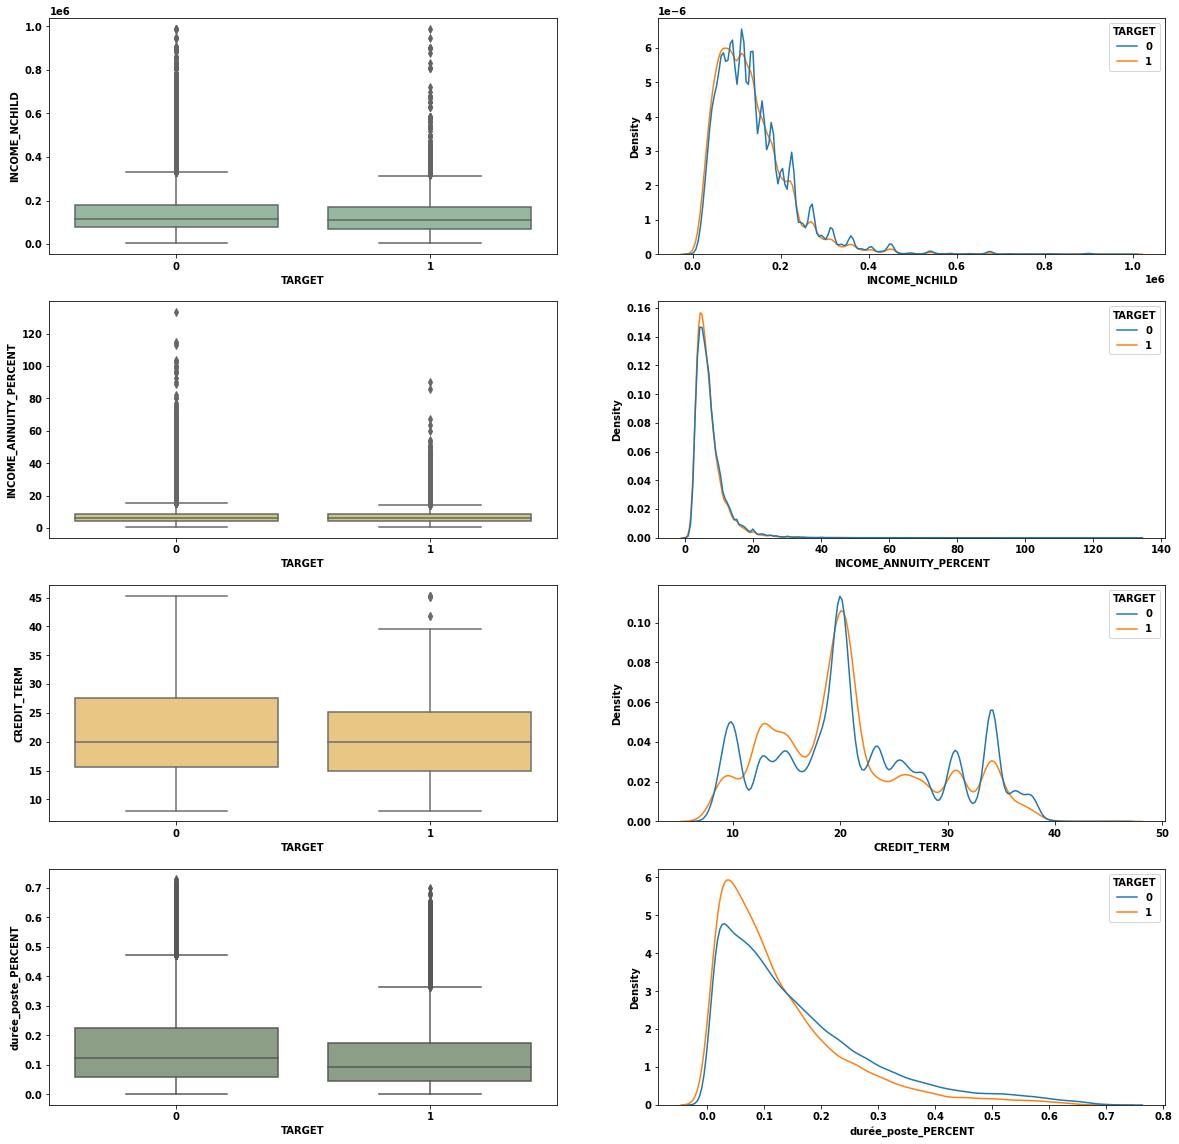

In [30]:
plt.figure(figsize=(20,20))
for i, col in tqdm(enumerate(feat_engineer_list), total=4):
    plt.subplot(4,2,2*i+1)
    color = list(np.random.uniform(low=0.0, high=1.0, size=3))
    sns.boxplot(data= app_train, y= col, x = 'TARGET', color=color)
    plt.subplot(4,2,2*i+2)
    sns.kdeplot(data= app_train, x = col, hue = 'TARGET', common_norm=False)
plt.show()

<a href="#sommaire" rev="footnote">&#8617;</a>

##   <a name ='split-des-données'>**Données de l'entraînement et de test**</a>

In [31]:
from sklearn.model_selection import train_test_split
from functions_project_4 import *


y = app_train['TARGET'].copy()
X = app_train.drop(columns=['SK_ID_CURR', 'ORGANIZATION_TYPE','TARGET']).copy()
X_app_test = app_test.drop(columns=['SK_ID_CURR', 'ORGANIZATION_TYPE']).copy()

In [32]:
# Diviser les données en données de train et données de test
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=seed)
print("Distribution du label des données de l'apprentissage de de test: \n")
print('train label: \n', y_train.value_counts(normalize=True))
print('\n')
print('test label: \n', y_test.value_counts(normalize=True))

Distribution du label des données de l'apprentissage de de test: 

train label: 
 0    0.919271
1    0.080729
Name: TARGET, dtype: float64


test label: 
 0    0.919272
1    0.080728
Name: TARGET, dtype: float64


In [33]:
X_train_encoded, X_test_encoded = OHE_preprocessing(X_train,X_test)
X_train_encod_imputed, X_test_encod_imputed = OHE_med_preprocessing(X_train, X_test)
X_train_encod_imputed_std, X_test_encod_imputed_std = OHE_med_preprocessing_std(X_train, X_test)
X_train_encod_imputed_minmax, X_test_encod_imputed_minmax = OHE_med_preprocessing_minmax(X_train, X_test)

<a href="#sommaire" rev="footnote">&#8617;</a>

# <a name ='Modélisation'>4. Modélisation</a>

## <a name ='Classifier-Aléatoire'>Classifier Aléatoire</a>

DummyClassifier(random_state=0, strategy='uniform') 

F2 train  mean :  0.24
F2 validation mean :  0.24


confusion_matrix :


predicted,0,1,total
Actual,,,
0,56538,4965,61503
1,0,0,0
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.92    1.00   0.98 56538.00
1       0.00    0.00   0.00  4965.00


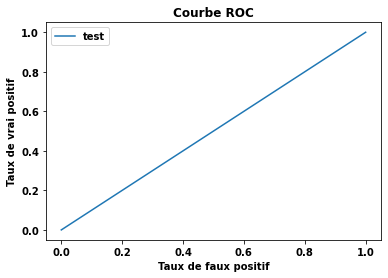

DummyClassifier(random_state=0, strategy='uniform')

In [34]:
from sklearn.dummy import DummyClassifier
import warnings
warnings.simplefilter("ignore")

baseline = DummyClassifier(strategy='uniform', random_state=seed)
learning_model(baseline, X_train_encod_imputed_std.values, y_train, X_test_encod_imputed_std.values, y_test)

<a href="#sommaire" rev="footnote">&#8617;</a>

## <a name ='Régression-logistique'>Régression logistique</a>

In [35]:
from sklearn.metrics import fbeta_score, make_scorer
beta = 2
f2_scorer = make_scorer(fbeta_score, beta=beta)

LogisticRegression(random_state=0) 

F2 train  mean :  0.01
F2 validation mean :  0.01


confusion_matrix :


predicted,0,1,total
Actual,,,
0,56510,4923,61433
1,28,42,70
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.92    1.00   0.98 56538.00
1       0.60    0.01   0.01  4965.00


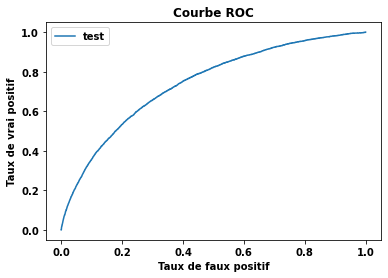

LogisticRegression(random_state=0)

In [36]:
from sklearn.linear_model import LogisticRegression

baseline_log = LogisticRegression(random_state=seed)
learning_model(baseline_log, X_train_encod_imputed_std.values, y_train, X_test_encod_imputed_std.values, y_test)

Best f2_scorer score :  0.39673438448874665
LogisticRegression(C=166.81005372000558, class_weight={0: 0.5, 1: 6},
                   random_state=0) 

F2 train  mean :  0.4
F2 validation mean :  0.4


confusion_matrix :


predicted,0,1,total
Actual,,,
0,37564,1537,39101
1,18974,3428,22402
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.96    0.66   0.71 56538.00
1       0.15    0.69   0.41  4965.00


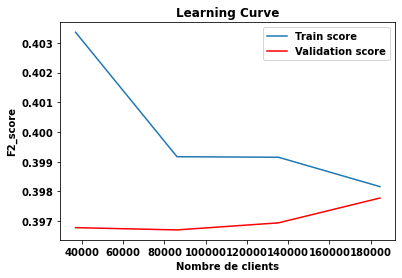

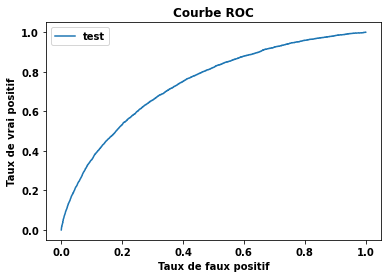

LogisticRegression(C=166.81005372000558, class_weight={0: 0.5, 1: 6},
                   random_state=0)

In [37]:
from sklearn.model_selection import GridSearchCV

log = LogisticRegression(random_state=seed)

l0 = [1, 0.8,0.7,0.6,0.5]
l1 = [6,5,4,3]
weights = []
for x in l0:
    for y in l1:
        weights = weights + [{0:x, 1:y}]
        
params = {'class_weight' : weights, 'C': np.logspace(-4,4,10)}
grid_log = GridSearchCV(log, param_grid=params, scoring=f2_scorer, cv=2)
grid_log.fit(X_train_encod_imputed_std.values, y_train)
print('Best f2_scorer score : ',grid_log.best_score_)

learning_model(grid_log.best_estimator_, X_train_encod_imputed_std.values, y_train, X_test_encod_imputed_std.values, y_test, 
               RocCurve=True, LearningCurve = True)

<a href="#sommaire" rev="footnote">&#8617;</a>

## <a name ='Arbre-de-décision'>Arbre de décision</a>

DecisionTreeClassifier(random_state=0) 

F2 train  mean :  1.0
F2 validation mean :  0.16


confusion_matrix :


predicted,0,1,total
Actual,,,
0,51545,4112,55657
1,4993,853,5846
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.93    0.91   0.91 56538.00
1       0.15    0.17   0.17  4965.00


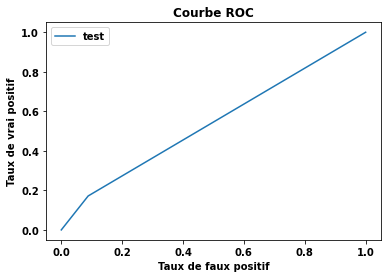

DecisionTreeClassifier(random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier

baseline_tree = DecisionTreeClassifier(random_state=seed)
learning_model(baseline_tree, X_train_encod_imputed.values, y_train, X_test_encod_imputed.values, y_test)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 6}, max_depth=6, random_state=0) 

F2 train  mean :  0.39
F2 validation mean :  0.38


confusion_matrix :


predicted,0,1,total
Actual,,,
0,37897,1678,39575
1,18641,3287,21928
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.96    0.67   0.71 56538.00
1       0.15    0.66   0.39  4965.00


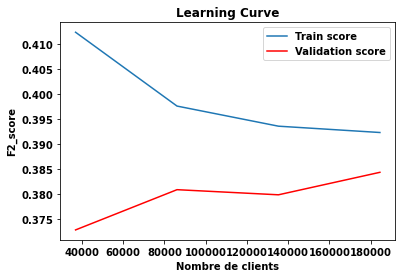

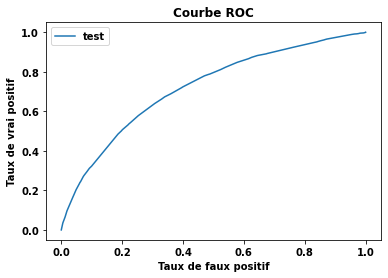

DecisionTreeClassifier(class_weight={0: 0.5, 1: 6}, max_depth=6, random_state=0)

In [63]:
tree =  DecisionTreeClassifier(random_state=seed)


l0 = [1, 0.8,0.7,0.6,0.5]
l1 = [6,5,4,3]
weights = []
for x in l0:
    for y in l1:
        weights = weights + [{0:x, 1:y}]
              
params = {'class_weight' : weights, 'max_depth' : np.arange(5,10,1)}
grid_tree = GridSearchCV(tree, param_grid=params, scoring=f2_scorer, cv=4, verbose=3)
grid_tree.fit(X_train_encod_imputed.values, y_train)
print('Best f2_scorer score : ',grid_tree.best_score_)

learning_model(grid_tree.best_estimator_, X_train_encod_imputed.values, y_train, X_test_encod_imputed.values, y_test, 
               LearningCurve=True)

<a href="#sommaire" rev="footnote">&#8617;</a>

## <a name ='Forêt-Aléatoire'>Forêt Aléatoire</a>

RandomForestClassifier(class_weight={0: 0.5, 1: 6}, max_depth=4,
                       n_estimators=10, random_state=0) 

F2 train  mean :  0.39
F2 validation mean :  0.39


confusion_matrix :


predicted,0,1,total
Actual,,,
0,36540,1490,38030
1,19998,3475,23473
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.96    0.65   0.69 56538.00
1       0.15    0.70   0.40  4965.00


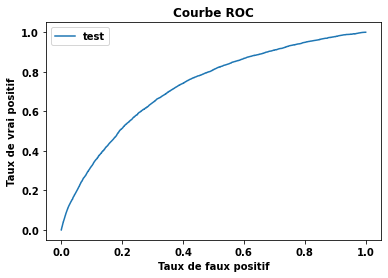

RandomForestClassifier(class_weight={0: 0.5, 1: 6}, max_depth=4,
                       n_estimators=10, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier

baseline_forest = RandomForestClassifier(class_weight={0: 1, 1: 6}, max_depth=4, n_estimators=10, random_state=seed) 
learning_model(baseline_forest,X_train_encod_imputed.values, y_train, X_test_encod_imputed.values, y_test)

RandomForestClassifier(class_weight={0: 0.5, 1: 6}, max_depth=5, random_state=0) 

F2 train  mean :  0.4
F2 validation mean :  0.39


confusion_matrix :


predicted,0,1,total
Actual,,,
0,35910,1378,37288
1,20628,3587,24215
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.96    0.64   0.68 56538.00
1       0.15    0.72   0.41  4965.00


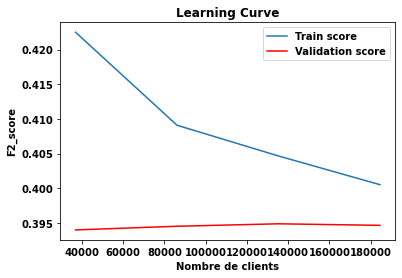

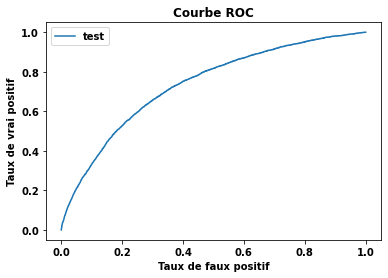

{'class_weight': {0: 0.5, 1: 6}, 'max_depth': 5, 'n_estimators': 100}

In [61]:
forest =  RandomForestClassifier(random_state=seed)

# dictionnaires des poids 
l0 = [0.5,1]
l1 = [7,6]
weights = []
for x in l0:
    for y in l1:
        weights = weights + [{0:x, 1:y}]
        
              
params = {'class_weight' : weights,'n_estimators': [50,100,200],'max_depth' : np.arange(4,6,1)}

grid_forest = GridSearchCV(forest, param_grid=params, scoring=f2_scorer)
grid_forest.fit(X_train_encod_imputed_std.values, y_train)
print('Best f2_scorer score : ',grid_forest.best_score_)

learning_model(grid_forest.best_estimator_, X_train_encod_imputed.values, y_train, X_test_encod_imputed.values, y_test, 
               LearningCurve = True)
grid_forest.best_params_

best params = {'class_weight': {0: 0.5, 1: 6}, 'max_depth': 5, 'n_estimators': 100}

<a href="#sommaire" rev="footnote">&#8617;</a>

## <a name ='Gradient-Boosting'>Gradient Boosting (XGBoost)</a>

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) 

F2 train  mean :  0.5
F2 validation mean :  0.41


confusion_matrix :


predicted,0,1,total
Actual,,,
0,51164,3073,54237
1,5374,1892,7266
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.94    0.90   0.91 56538.00
1       0.26    0.38   0.35  4965.00


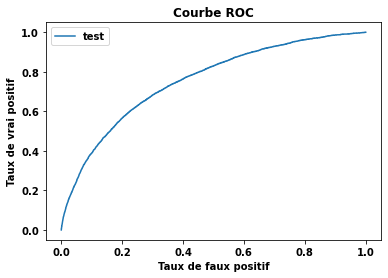

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
from xgboost import XGBClassifier
baseline_xgb = XGBClassifier(eval_metric = 'logloss',random_state=seed)
learning_model(baseline_xgb, X_train_encod_imputed.values, y_train,X_test_encod_imputed.values, y_test, 
               w={0:0.5,1:8}, threshold=0.75)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

F2 train  mean :  0.44
F2 validation mean :  0.4


confusion_matrix :


predicted,0,1,total
Actual,,,
0,46213,2223,48436
1,10325,2742,13067
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.95    0.82   0.84 56538.00
1       0.21    0.55   0.42  4965.00


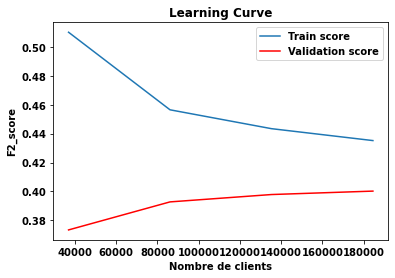

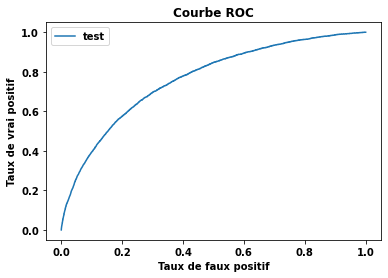

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
from sklearn.utils import class_weight

xgb = XGBClassifier(eval_metric = 'error', random_state=seed)

params = {'learning_rate' : np.arange(0.1,0.2,0.1), 
          'max_depth' : np.arange(3,7,1),
          'n_estimators': [10,50,100]}

grid_xgb = GridSearchCV(xgb, param_grid=params, scoring=f2_scorer, cv=4, verbose=3)
weights = class_weight.compute_sample_weight(class_weight={0:1,1:8},y=y_train)
grid_xgb.fit(X_train_encod_imputed.values, y_train, sample_weight=weights)
print('Best f2_scorer score : ',grid_xgb.best_score_)
learning_model(grid_xgb.best_estimator_, X_train_encod_imputed.values, y_train,X_test_encod_imputed.values, 
               y_test, w={0:1,1:8}, LearningCurve=True)

best params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

<a href="#sommaire" rev="footnote">&#8617;</a>

# <a name ='Choix-du-modèle'>5. Choix du modéle</a>

In [75]:
best_model = grid_xgb.best_estimator_
learning_model(best_model, X_train_encod_imputed.values, y_train,X_test_encod_imputed.values, 
               y_test, w={0:1,1:8}, threshold=0.5, RocCurve=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

F2 train  mean :  0.44
F2 validation mean :  0.4


confusion_matrix :


predicted,0,1,total
Actual,,,
0,46213,2223,48436
1,10325,2742,13067
total,56538,4965,61503


   precision  recall  fbeta  support
0       0.95    0.82   0.84 56538.00
1       0.21    0.55   0.42  4965.00


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

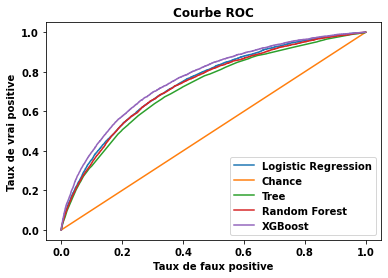

In [49]:
best1 = grid_log.best_estimator_
best2 = grid_tree.best_estimator_
best3 = grid_forest.best_estimator_
best4 = grid_xgb.best_estimator_

models = [baseline,best2,best3, best_model]
models_names = ['Chance','Tree', 'Random Forest', 'XGBoost']


yprob_test = best1.predict_proba(X_test_encod_imputed_std)[:,1]
fpr_test, tpr_test, thld_test = roc_curve(y_test, yprob_test)
plt.plot(fpr_test, tpr_test, label= 'Logistic Regression')
plt.legend()
for model, name in zip(models, models_names):
    yprob_test = model.predict_proba(X_test_encod_imputed)[:,1]
    fpr_test, tpr_test, thld_test = roc_curve(y_test, yprob_test)
    plt.plot(fpr_test, tpr_test, label= name)
    plt.legend()
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positive')
plt.ylabel('Taux de vrai positive')
plt.show()


<a href="#sommaire" rev="footnote">&#8617;</a>

# <a name ='Interprétabilité-du-modèle'>6. Interprétabilité du modèle</a>

##  <a name ='Global'> Global</a>

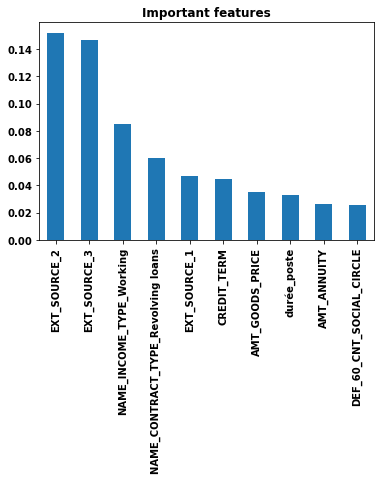

In [50]:
pd.Series(best_model.feature_importances_, X_test_encod_imputed.columns).sort_values(ascending=False)[0:10].plot.bar()
plt.title('Important features')
plt.show()

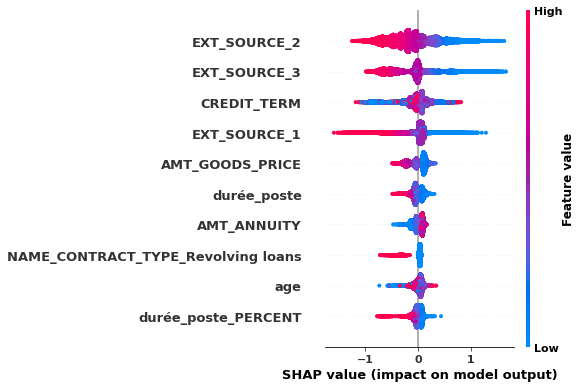

In [51]:
import shap

import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)

shap.initjs()
shap_explainer = shap.TreeExplainer(best_model)
shap_values = shap_explainer.shap_values(X_test_encod_imputed)
shap.summary_plot(shap_values, X_test_encod_imputed, max_display=10)

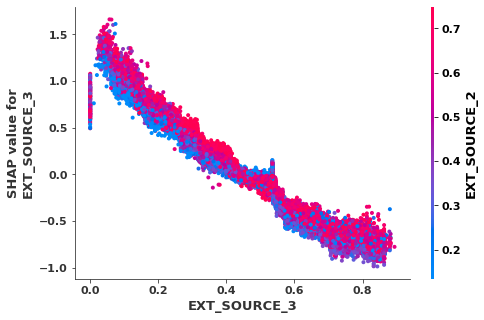

In [52]:
shap.dependence_plot('EXT_SOURCE_3',shap_values, X_test_encod_imputed)

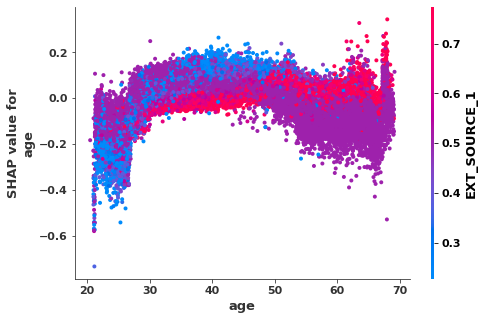

In [53]:
shap.dependence_plot('age',shap_values, X_test_encod_imputed)

<a href="#sommaire" rev="footnote">&#8617;</a>

##  <a name ='Local'> Local</a>

In [54]:
n = 5
client = X_test_encod_imputed.iloc[n,:]
client_shap = shap_values[n]
shap.force_plot(shap_explainer.expected_value,client_shap ,client.values, feature_names=X_train_encod_imputed.columns)


In [55]:
dt = time() - t0
print('le temps de l\'exécution de ce notebook est : ',dt/3600)

le temps de l'exécution de ce notebook est :  2.164240981737773


<a href="#sommaire" rev="footnote">&#8617;</a>